 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources\whale_returns.csv")
# YOUR CODE HERE
whale_df=pd.read_csv(whale_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum(axis="rows")

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df=whale_df.dropna()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


We donot have any missing values, as we can see from COunt Nulls Cell.

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df=pd.read_csv(algo_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum(axis="rows")

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df=algo_returns_df.dropna()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_hist_df=pd.read_csv(sp500_history_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_hist_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
# Check Data Types
# YOUR CODE HERE
sp500_hist_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_hist_df["Close"]=sp500_hist_df["Close"].str.split("$").str[1]
sp500_hist_df.sort_index(ascending=True, inplace=True)
sp500_hist_df=sp500_hist_df.astype(float)

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_ret_sp500=sp500_hist_df.pct_change()
daily_ret_sp500

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
# YOUR CODE HERE
daily_ret_sp500=daily_ret_sp500.dropna()

In [14]:
# Rename Column
# YOUR CODE HERE
daily_ret_sp500.columns=["S&P 500"]
daily_ret_sp500

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combd_returns=pd.concat([whale_df,algo_returns_df,daily_ret_sp500], axis=1, join="inner")
combd_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

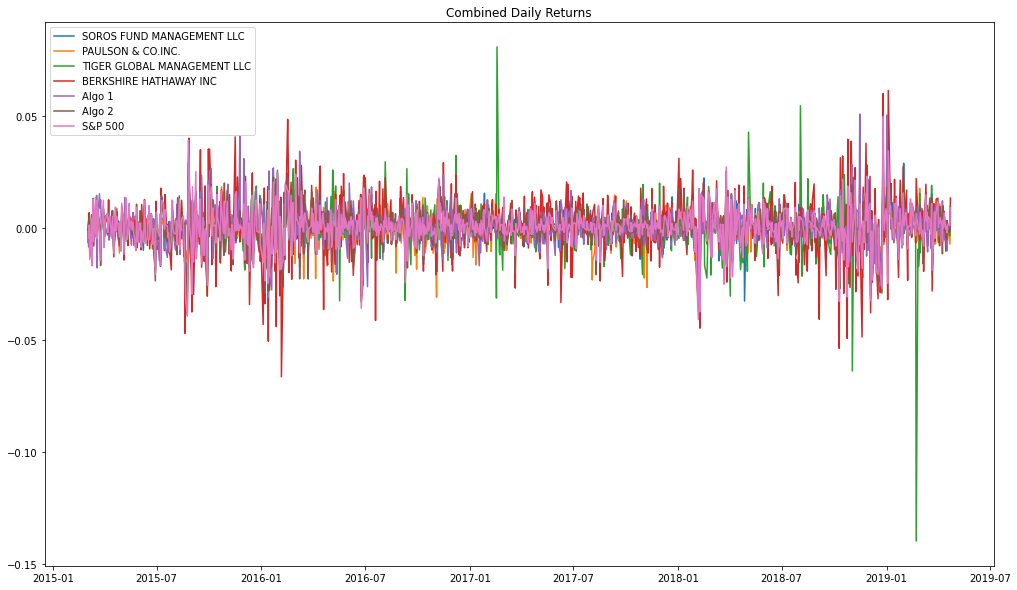

In [16]:
# Plot daily returns
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))
plt.plot(combd_returns)
plt.legend(combd_returns.columns)
plt.title("Combined Daily Returns")
plt.show()

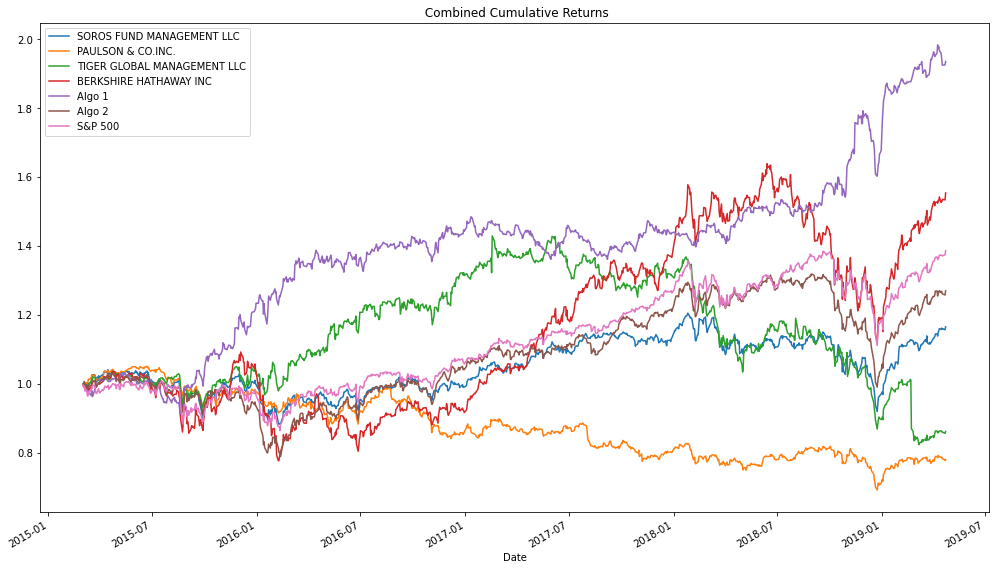

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
combd_cum_ret=(1+combd_returns).cumprod()
combd_cum_ret.plot(figsize=(17,10), title= " Combined Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

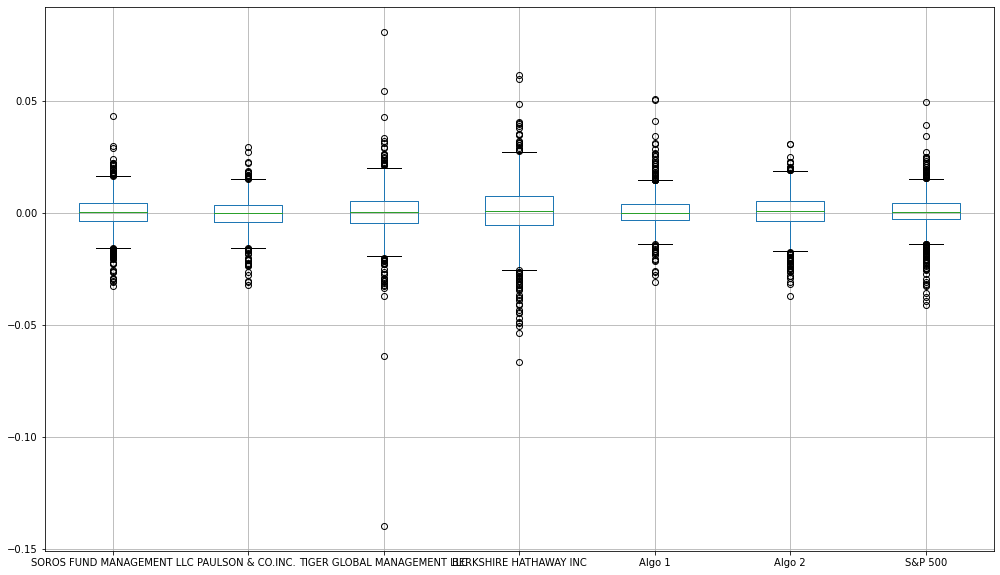

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE
combd_returns.boxplot(figsize=(17,10))


In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combd_daily_std=combd_returns.std().sort_values(ascending=True)
print(combd_daily_std)

print("TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC, have higher risk than S&P500")

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64
TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC, have higher risk than S&P500


In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combd_daily_std[combd_daily_std>combd_daily_std["S&P 500"]]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_combd_std=combd_daily_std*np.sqrt(252)
annualized_combd_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

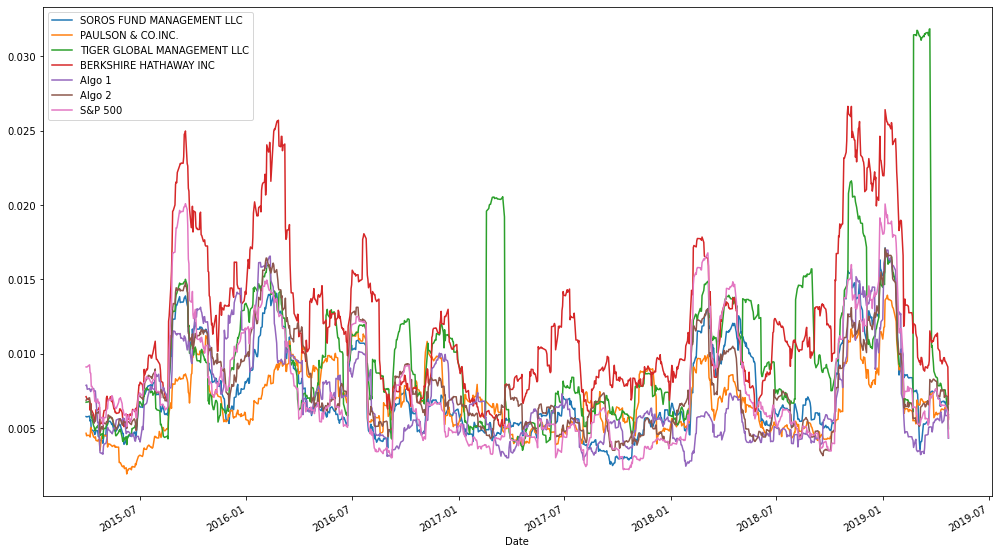

In [22]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combd_returns.rolling(window=21).std().plot(figsize=(17,10))

In [23]:
# Correlation
# YOUR CODE HERE
combd_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
beta=[]
for i in combd_returns.columns:
    beta.append(combd_returns[i].cov(combd_returns['S&P 500'])/combd_returns['S&P 500'].var())
    
beta=pd.DataFrame(list(zip(combd_returns.columns,beta)), columns= ['Portforlio','Beta'])    
beta

,Portforlio,Beta
0,SOROS FUND MANAGEMENT LLC,0.773375
1,PAULSON & CO.INC.,0.549886
2,TIGER GLOBAL MANAGEMENT LLC,0.794653
3,BERKSHIRE HATHAWAY INC,1.134789
4,Algo 1,0.248991
5,Algo 2,0.837535
6,S&P 500,1.000000


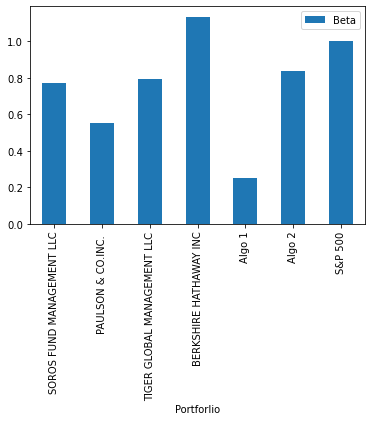

In [25]:
beta=beta.set_index('Portforlio')
beta.plot(kind='bar')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [26]:
# (OPTIONAL) YOUR CODE HERE
combd_returns.evm(halflife='21 days').mean()

AttributeError: 'DataFrame' object has no attribute 'evm'

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio=combd_returns.mean()*252/(combd_returns.std()*np.sqrt(252))
sharpe_ratio

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind='bar',title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE
path_appl=('./Resources/aapl_historical.csv')
aapl=pd.read_csv(path_appl,index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
aapl

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [28]:
# Read the second stock
# YOUR CODE HERE
path_goog=('./Resources/goog_historical.csv')
google=pd.read_csv(path_goog,index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
google.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [29]:
# Read the third stock
# YOUR CODE HERE
path_cost=('./Resources/cost_historical.csv')
cost=pd.read_csv(path_cost,index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
stocks=pd.concat([google.NOCP,cost.NOCP,aapl.NOCP],axis=1, join='inner')
stocks.columns=['Google','Costco','Apple']

In [31]:
# Reset the index
# YOUR CODE HERE
stocks.reset_index(inplace=True)

In [32]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
stocks.set_index('Trade DATE', inplace=True)
stocks= stocks.dropna()
stocks

,Google,Costco,Apple
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75
...,...,...,...
2018-05-17,1078.59,199.60,186.99
2018-05-16,1081.77,198.71,188.18
2018-05-15,1079.23,195.48,186.44


In [33]:
# Drop Nulls
# YOUR CODE HERE
stocks.sort_index(ascending=True,inplace=True)
stocks=stocks.pct_change().dropna()
stocks.head()

,Google,Costco,Apple
Trade DATE,,,
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324
2018-05-18,-0.011339,-0.003206,-0.003637


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
Custom_portfolio=(weights[0]*stocks[stocks.columns[0]])+(weights[1]*stocks[stocks.columns[1]])+(weights[2]*stocks[stocks.columns[2]])
Custom_portfolio

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE
combd_returns.sort_index(ascending=True)
combd_returns=pd.concat([combd_returns,pd.DataFrame(Custom_portfolio)], join='inner', axis=1)


In [36]:
combd_returns.loc['2019-04-15':'2019-04-22']

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [37]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [39]:
# Risk
# YOUR CODE HERE
combd_returns["Custom_Portfolio"]=combd_returns['O']
combd_returns

KeyError: 'O'

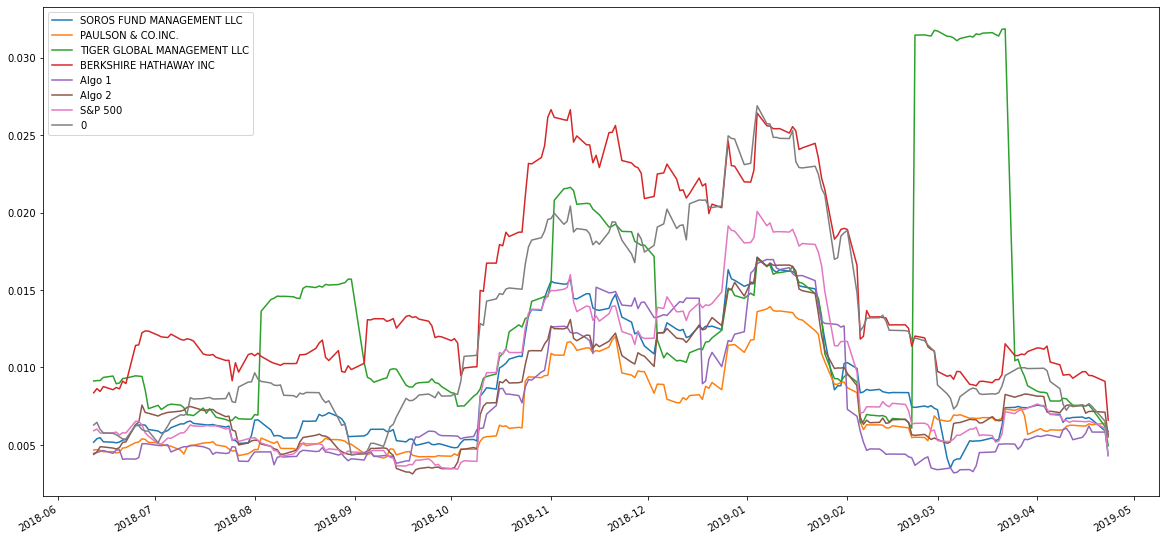

In [40]:
# Rolling
# YOUR CODE HERE
combd_returns.rolling(window=21).std().plot(figsize=(20,10))


In [47]:
# Beta
# YOUR CODE HERE
beta=[]
for i in combd_returns.columns:
    beta.append(combd_returns[i].cov(combd_returns['S&P 500'])/combd_returns['S&P 500'].var())
    
beta=pd.DataFrame(list(zip(combd_returns.columns,beta)), columns= ['Portforlio','Beta'])    
beta

,Portforlio,Beta
0,SOROS FUND MANAGEMENT LLC,0.845959
1,PAULSON & CO.INC.,0.588581
2,TIGER GLOBAL MANAGEMENT LLC,0.735623
3,BERKSHIRE HATHAWAY INC,1.385368
4,Algo 1,0.254438
5,Algo 2,0.803744
6,S&P 500,1.000000
7,0,1.212712


In [41]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
ann_sharpe_ratio=combd_returns.mean()*252/combd_returns.std()*np.sqrt(252)
ann_sharpe_ratio

SOROS FUND MANAGEMENT LLC      108.539745
PAULSON & CO.INC.               65.201933
TIGER GLOBAL MANAGEMENT LLC   -260.622506
BERKSHIRE HATHAWAY INC          40.258457
Algo 1                         512.987585
Algo 2                          20.313025
S&P 500                        147.374610
0                              235.146913
dtype: float64

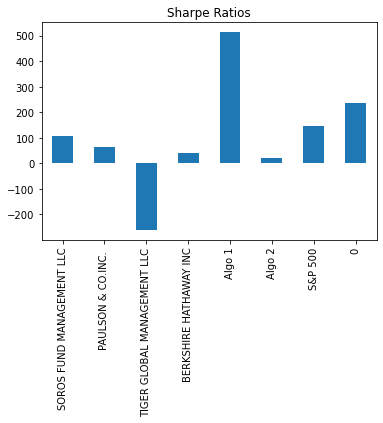

In [42]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
ann_sharpe_ratio.plot(kind='bar',title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE

In [46]:
combd_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
0,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000
